# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Based on the work of Chanin Nantasenamat [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)


---

## **1. Import libraries**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [3]:
#! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

In [8]:
df = pd.read_csv('/Users/damaro/Documents/Bioinformatics/HSC70_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [9]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.982967
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000435
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000435
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000435
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000435


## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [10]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
88,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
90,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [11]:
Y = df.pIC50
Y

0     4.982967
1     3.000435
2     3.000435
3     3.000435
4     3.000435
        ...   
87    5.000000
88    5.000000
89    5.000000
90    5.000000
91    5.000000
Name: pIC50, Length: 92, dtype: float64

### **3.3. Let's examine the data dimension**

In [12]:
X.shape

(92, 881)

In [13]:
Y.shape

(92,)

### **3.4. Remove low variance features**

In [14]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [15]:
X.shape

(92, 139)

## **4. Data split (80/20 ratio)**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
X_train.shape, Y_train.shape

((73, 139), (73,))

In [18]:
X_test.shape, Y_test.shape

((19, 139), (19,))

## **5. Building a Regression Model using Random Forest**

In [32]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.01497648623983161

In [33]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

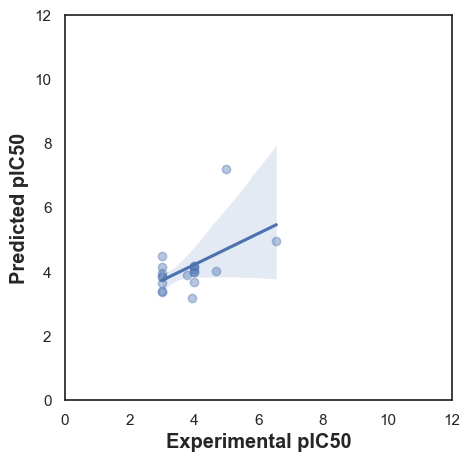

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(data=pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred}), x='Y_test', y='Y_pred', scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show